In [ ]:
%%bash

head 2017.04.21_full.txt

In [1]:
# required packages
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
import csv
%matplotlib inline

In [2]:
%%time
#Read in txt file (already downloaded and unzipped)
UPW_df2 = pd.read_table('2017.04.21_full.txt', sep='\t', header=None, error_bad_lines=False, warn_bad_lines=True)

b'Skipping line 28200107: expected 13 fields, saw 15\nSkipping line 28200152: expected 13 fields, saw 15\n'
b'Skipping line 31658316: expected 13 fields, saw 15\nSkipping line 31665029: expected 13 fields, saw 15\nSkipping line 31684400: expected 13 fields, saw 15\nSkipping line 31685576: expected 13 fields, saw 15\nSkipping line 31685907: expected 13 fields, saw 15\nSkipping line 31686836: expected 13 fields, saw 15\n'
b'Skipping line 63783551: expected 13 fields, saw 15\nSkipping line 63795360: expected 13 fields, saw 15\nSkipping line 63799359: expected 13 fields, saw 15\n'
b'Skipping line 63984594: expected 13 fields, saw 15\n'
b'Skipping line 72349111: expected 13 fields, saw 18\n'
b'Skipping line 72359921: expected 13 fields, saw 15\n'
b'Skipping line 80903926: expected 13 fields, saw 15\n'
b'Skipping line 81462828: expected 13 fields, saw 15\n'
<string>:2: DtypeWarning: Columns (2,3,8,10,12) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 8min 15s, sys: 55 s, total: 9min 10s
Wall time: 13min 37s


In [3]:
# Add column names
UPW_df2.columns = ['doi', 'evidence', 'best_open_url', 'license', 'oa_color', 'open_urls', 'year', 'title', 
                 'authors', 'publication_type', 'journal', 'publisher', 'subjects']

In [ ]:
%%time

# Start building a smaller df to use for testing
UPWsample2 = UPW_df[['doi','evidence', 'open_level','year', 'publication_type','journal', 'publisher', 'subjects']]

# Sample will only use data from 1950 to 2017
UPWsample2 = UPWsample2[(UPWsample2.year > 1949) & (UPWsample2.year < 2018)]

# Take a fraction of the full df for the sample
UPWsample2 = UPWsample2.sample(frac=0.005)

# Reset the index on the sample df
UPWsample2.reset_index(inplace=True)

In [ ]:
UPWsample2.shape

In [ ]:
# Save the sample df
UPWsample2.to_csv('UPWsample2.txt', sep='\t')

In [ ]:
!aws s3 cp UPWsample.txt s3://norlab-unpaywall/UPWsample.txt

In [ ]:
!aws s3 cp UnpaywallEDA.ipynb s3://norlab-unpaywall/UnpaywallEDA.ipynb

In [4]:
# Full df exploration
UPW_df2.count()

doi                 87751249
evidence            87721008
best_open_url       14391690
license              3970796
oa_color            87751249
open_urls           87403822
year                79115827
title               83950885
authors             72064740
publication_type    87750462
journal             83425669
publisher           87697351
subjects            50276277
dtype: int64

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


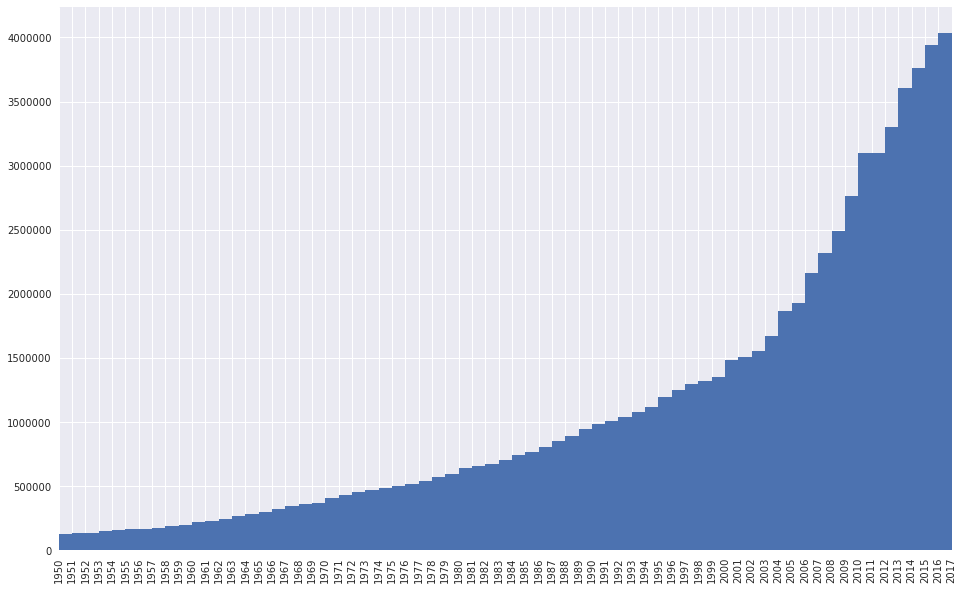

In [5]:
# Full df plot count of DOIS by year between 1950 - 2017
plt.figure(figsize=(16, 10))
plt.hist(UPW_df2['year'].dropna(), bins=np.arange(min(UPW_df2['year'].dropna()), max(UPW_df2['year'].dropna()) + 1, 1))

plt.xticks(np.arange(min(UPW_df2['year'].dropna()), max(UPW_df2['year'].dropna()) + 1, 1), rotation='vertical')

plt.xlim(1950,2017)
#plt.savefig('CountDOIS2_1950to2017.png')
plt.show()

In [ ]:
!aws s3 cp CountDOIS_1950to2017.png s3://norlab-unpaywall/CountDOIS_1950to2017.png

In [ ]:
UPWsample2.groupby(['year', 'oa_color']).agg('count')

In [ ]:
# Check to see how open_level correlates with evidence in sample df
UPWsample2.groupby(['evidence', 'oa_color']).agg('count')

In [6]:
# Check to see how open_level correlates with evidence in full df
# This is a check on the assumption that closed journals = black
EvidenceOpenLevelAgg2_df = UPW_df2.groupby(['evidence', 'oa_color']).agg('count')

In [7]:
EvidenceOpenLevelAgg2_df

doi  \
evidence                                           oa_color             
closed                                             black     73329316   
hybrid journal (via crossref license)              gold       1161623   
hybrid manual                                      gold             1   
manual                                             black            2   
                                                   green            7   
oa journal (via journal title in doaj)             gold       2961432   
oa journal (via publisher name)                    gold       1975915   
oa repository (via BASE doi match)                 gold         18324   
                                                   green      1470166   
oa repository (via BASE title and first author ... gold          1680   
                                                   green      4430645   
oa repository (via BASE title match)               gold          1387   
                                                   green       778415   
oa repository (via datacite prefix)                gold         66840   
oa repository (via doi prefix)                     gold          6419   
oa repository (via pmcid lookup)                   gold          1143   
                                                   green      1517693   

                                                             best_open_url  \
evidence                                           oa_color                  
closed                                             black                 0   
hybrid journal (via crossref license)              gold            1161623   
hybrid manual                                      gold                  1   
manual                                             black                 0   
                                                   green                 7   
oa journal (via journal title in doaj)             gold            2961432   
oa journal (via publisher name)                    gold            1975915   
oa repository (via BASE doi match)                 gold              18324   
                                                   green           1470166   
oa repository (via BASE title and first author ... gold               1680   
                                                   green           4430645   
oa repository (via BASE title match)               gold               1387   
                                                   green            778415   
oa repository (via datacite prefix)                gold              66840   
oa repository (via doi prefix)                     gold               6419   
oa repository (via pmcid lookup)                   gold               1143   
                                                   green           1517693   

                                                             license  \
evidence                                           oa_color            
closed                                             black           0   
hybrid journal (via crossref license)              gold       558746   
hybrid manual                                      gold            0   
manual                                             black           0   
                                                   green           0   
oa journal (via journal title in doaj)             gold      2541699   
oa journal (via publisher name)                    gold         4871   
oa repository (via BASE doi match)                 gold        11361   
                                                   green       56222   
oa repository (via BASE title and first author ... gold          315   
                                                   green      491515   
oa repository (via BASE title match)               gold          789   
                                                   green      128857   
oa repository (via datacite prefix)                gold         1240   
oa repository (via doi prefix)             

In [ ]:
EvidenceOpenLevelAgg2_df.to_csv('EvidenceOpenLevelAgg.csv')

In [ ]:
!aws s3 cp EvidenceOpenLevelAgg2.csv s3://norlab-unpaywall/EvidenceOpenLevelAgg2.csv

In [8]:
# What is the breakdown of years in the full df?
years = UPW_df2.year.unique()
np.sort(years)

array([    0.,  1400.,  1411.,  1425.,  1450.,  1456.,  1459.,  1469.,
        1472.,  1477.,  1478.,  1480.,  1483.,  1486.,  1487.,  1490.,
        1491.,  1492.,  1496.,  1497.,  1499.,  1500.,  1506.,  1508.,
        1513.,  1515.,  1518.,  1521.,  1523.,  1524.,  1525.,  1526.,
        1527.,  1528.,  1529.,  1530.,  1531.,  1532.,  1534.,  1535.,
        1536.,  1540.,  1542.,  1543.,  1544.,  1545.,  1546.,  1547.,
        1548.,  1549.,  1550.,  1551.,  1552.,  1553.,  1554.,  1555.,
        1556.,  1557.,  1558.,  1559.,  1560.,  1561.,  1562.,  1563.,
        1564.,  1565.,  1566.,  1567.,  1568.,  1569.,  1570.,  1571.,
        1573.,  1574.,  1575.,  1576.,  1577.,  1578.,  1579.,  1580.,
        1581.,  1582.,  1583.,  1584.,  1585.,  1586.,  1587.,  1588.,
        1589.,  1590.,  1591.,  1592.,  1593.,  1594.,  1595.,  1596.,
        1597.,  1598.,  1599.,  1600.,  1601.,  1602.,  1603.,  1604.,
        1605.,  1606.,  1607.,  1608.,  1609.,  1610.,  1611.,  1612.,
      

In [9]:
# How many open_levels in the sample df?
UPWsample2.open_level.unique()

NameError: name 'UPWsample2' is not defined

In [10]:
# How many years greater than 2017 in the full df?
UPW_df2[UPW_df2.year > 2018].size

6942

In [15]:
UPW_df2[UPW_df2.year > 2018].to_csv('PublicationYearOver2018.csv')

In [16]:
!aws s3 cp PublicationYearOver2018.csv s3://norlab-unpaywall/PublicationYearOver2018.csv

upload: ./PublicationYearOver2018.csv to s3://norlab-unpaywall/PublicationYearOver2018.csv


In [17]:
!rm PublicationYearOver2018.csv

In [11]:
# How many years equal 0 in the full df?
UPW_df2[UPW_df2.year == 0].size

22698

In [19]:
UPW_df2[UPW_df2.year == 0].to_csv('PublicationYear0.csv')

In [20]:
!aws s3 cp PublicationYear0.csv s3://norlab-unpaywall/PublicationYear0.csv

upload: ./PublicationYear0.csv to s3://norlab-unpaywall/PublicationYear0.csv


In [21]:
!rm PublicationYear0.csv

In [12]:
# Overview of null values in the full df
UPW_df2.isnull().sum()

doi                        0
evidence               30241
best_open_url       73359559
license             83780453
oa_color                   0
open_urls             347427
year                 8635422
title                3800364
authors             15686509
publication_type         787
journal              4325580
publisher              53898
subjects            37474972
dtype: int64

In [13]:
# Counts of each level in full df
UPW_df2.groupby('oa_color').size()

oa_color
black    73359559
gold      6194764
green     8196926
dtype: int64

In [ ]:
colors = ['black', 'gold', 'green']
# Bar graph of DOI counts by open_level in the sample df
UPWsample2[(UPWsample2.year > 1989) & (UPWsample2.year < 2017)].groupby(
    ['year', 'oa_color'])['doi'].agg('count').unstack().plot(kind= 'bar', figsize=(16,8), color=colors)

In [ ]:
# Create an object that groups data by year and open_level
open_yr = UPWsample2.groupby(['year', 'open_level'])
# From the object count of dois
# Show the first row
open_yr['doi'].size().head(20)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


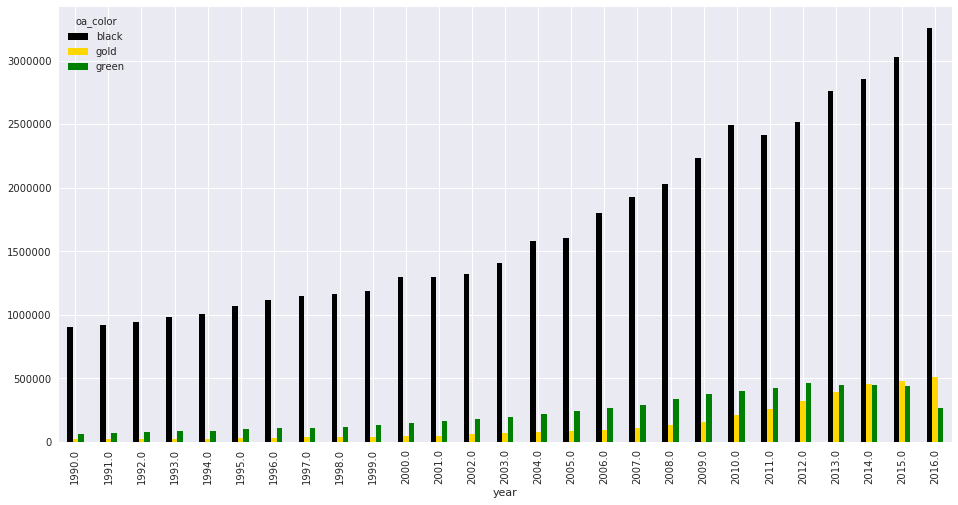

In [14]:
colors = ['black', 'gold', 'green']
# Bar graph of DOI counts by open_level in the full df
UPW_df2[(UPW_df2.year > 1989) & (UPW_df2.year < 2017)].groupby(
    ['year', 'oa_color'])['doi'].agg('count').unstack().plot(kind= 'bar', figsize=(16,8), color=colors)

#plt.savefig('OpenLevelsBar2_1990to2016.png')

In [ ]:
!aws s3 cp OpenLevelsBar2_1990to2016.png s3://norlab-unpaywall/OpenLevelsBar2_1990to2016.png

(array([ 1950.,  1960.,  1970.,  1980.,  1990.,  2000.,  2010.,  2020.]),
 <a list of 8 Text xticklabel objects>)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


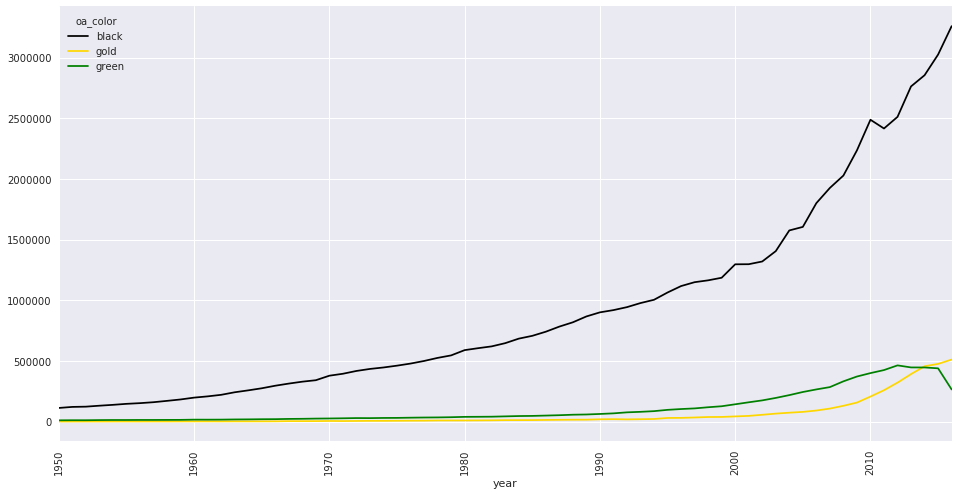

In [15]:
colors = ['black', 'gold', 'green']
UPW_df2[(UPW_df2.year > 1949) & (UPW_df2.year < 2017)].groupby(
    ['year', 'oa_color'])['doi'].agg('count').unstack().plot(figsize=(16,8), color=colors)
plt.xticks(rotation='vertical')

#plt.savefig('OpenLevelsLine2_1950to2016.png')

In [ ]:
!aws s3 cp OpenLevelsLine2_1950to2016.png s3://norlab-unpaywall/OpenLevelsLine2_1950to2016.png

In [ ]:
# Create a table of open_level by year for sample df
pd.pivot_table(UPWsample[UPWsample.year < 2018], index='year', 
               columns='open_level', values='doi', fill_value=0, aggfunc='count', margins=True)

In [16]:
# Create a table of open_level by year for full df
YearLevelAgg2_df = pd.pivot_table(UPW_df2, 
                                 index='year', 
                                 columns='oa_color', 
                                 values='doi', 
                                 fill_value=0, 
                                 aggfunc='count', 
                                 margins=True)
YearLevelAgg2_df

oa_color,black,gold,green,All
year,,,,
0.0,1730.0,0.0,16.0,1746.0
1400.0,24.0,0.0,0.0,24.0
1411.0,1.0,0.0,0.0,1.0
1425.0,1.0,0.0,0.0,1.0
1450.0,2.0,0.0,0.0,2.0
1456.0,1.0,0.0,0.0,1.0
1459.0,1.0,0.0,0.0,1.0
1469.0,1.0,0.0,0.0,1.0
1472.0,1.0,0.0,0.0,1.0


In [ ]:
YearLevelAgg2_df.to_csv('YearLevelAgg2.csv')

In [ ]:
!aws s3 cp YearLevelAgg2.csv s3://norlab-unpaywall/YearLevelAgg2.csv

In [17]:
# Create a table of open_level by publisher for full df
PublisherLevelAgg2_df = pd.pivot_table(UPW_df2, 
                                 index='publisher', 
                                 columns='oa_color', 
                                 values='doi', 
                                 fill_value=0, 
                                 aggfunc='count', 
                                 margins=True)
PublisherLevelAgg2_df

oa_color,black,gold,green,All
publisher,,,,
027.7 Zeitschrift für Bibliothekskultur / Journal for Library Culture,0.0,7.0,0.0,7.0
027.7 Zeitschrift fĂźr Bibliothekskultur / Journal for Library Culture,0.0,2.0,0.0,2.0
21st Century COE Program,21.0,0.0,19.0,40.0
21st Century Political Science Association,390.0,0.0,0.0,390.0
"4S go, s.r.o.",1.0,73.0,0.0,74.0
"8872147 Canada, Inc.",170.0,0.0,8612.0,8782.0
:unav,1.0,0.0,0.0,1.0
; Technische Informationsbibliothek u. Universitätsbibliothek,0.0,1.0,0.0,1.0
A Continuum imprint,3.0,0.0,0.0,3.0


In [ ]:
PublisherLevelAgg2_df.to_csv('PublisherLevelAgg2.csv')

In [ ]:
!aws s3 cp PublisherLevelAgg2.csv s3://norlab-unpaywall/PublisherLevelAgg2.csv

In [18]:
# Create a table of open_level by publisher and year for full df
PublisherYearLevelAgg2_df = pd.pivot_table(UPW_df2, 
                                 index=['publisher', 'year'], 
                                 columns='oa_color', 
                                 values='doi', 
                                 fill_value=0, 
                                 aggfunc='count', 
                                 margins=True)
PublisherYearLevelAgg2_df.head(10)

oa_color                                                   black  gold  green  \
publisher                                          year                         
027.7 Zeitschrift für Bibliothekskultur / Journ... 2013.0    0.0   3.0    0.0   
                                                   2015.0    0.0   4.0    0.0   
027.7 Zeitschrift fĂźr Bibliothekskultur / Jour... 2014.0    0.0   1.0    0.0   
                                                   2015.0    0.0   1.0    0.0   
21st Century COE Program                           2008.0    7.0   0.0   12.0   
                                                   2009.0   14.0   0.0    7.0   
21st Century Political Science Association         2007.0   42.0   0.0    0.0   
                                                   2008.0   35.0   0.0    0.0   
                                                   2009.0   55.0   0.0    0.0   
                                                   2010.0   42.0   0.0    0.0   

oa_color                                                    All  
publisher                                          year          
027.7 Zeitschrift für Bibliothekskultur / Journ... 2013.0   3.0  
                                                   2015.0   4.0  
027.7 Zeitschrift fĂźr Bibliothekskultur / Jour... 2014.0   1.0  
                                                   2015.0   1.0  
21st Century COE Program                           2008.0  19.0  
                                                   2009.0  21.0  
21st Century Political Science Association         2007.0  42.0  
                                                   2008.0  35.0  
                                                   2009.0  55.0  
                                                   2010.0  42.0

In [ ]:
PublisherYearLevelAgg2_df.to_csv('PublisherYearLevelAgg2.csv')

In [ ]:
!aws s3 cp PublisherYearLevelAgg2.csv s3://norlab-unpaywall/PublisherYearLevelAgg2.csv

In [19]:
# What are the various categories for evidence?
UPW_df2['evidence'].unique()

array(['closed', 'oa repository (via BASE title and first author match)',
       'oa repository (via pmcid lookup)',
       'oa repository (via BASE doi match)',
       'oa repository (via BASE title match)', nan,
       'oa journal (via journal title in doaj)',
       'hybrid journal (via crossref license)', 'manual',
       'oa repository (via doi prefix)',
       'oa repository (via datacite prefix)', 'hybrid manual',
       'oa journal (via publisher name)'], dtype=object)

In [20]:
# What are the categories for publication_type
UPW_df2['publication_type'].unique()

array(['journal-article', nan,
       'Journal of the American Medical Association',
       'JAMA: The Journal of the American Medical Association', 'book',
       'book-chapter', 'monograph', 'reference-book', 'reference-entry',
       'journal-issue', 'dataset', 'journal', 'Q.J.R. Meteorol. Soc.',
       'book-series', 'Materialwissenschaft und Werkstofftechnik',
       'Lecture Notes in Computer Science', 'Internationaler Vertrieb',
       'component', 'International Journal of Colorectal Disease',
       'Theory and Decision', 'The Lancet', 'other',
       'Journal of PeriAnesthesia Nursing', 'Rhizosphere', 'Wear',
       'Journal of the American Pharmaceutical Association (Practical Pharmacy ed.)',
       'The Cambridge Companion to American Judaism', 'book-track',
       'book-section', 'The Journal of Economic History',
       'The Assurance Magazine and Journal of the Institute of Actuaries',
       'Chem. Eng. News', 'Chemical & Engineering News Archive',
       'Journal of Ch

In [10]:
# Ferret out the rows in which publication_type is mis-read
goodpubs = ['journal-article', 'nan', 'book', 'book-chapter', 'monograph', 'reference-book', 'reference-entry',
           'journal-issue', 'dataset', 'journal', 'book-series', 'component', 'other', 'book-track', 'book-section', 
           'report', 'book-set', 'proceedings', 'proceedings-article', 'posted-content', 'standard', 'interactions',
           'dissertation', 'misc', 'book-part', 'report-series', 'journal-volume']
UPW_df2[~UPW_df2['publication_type'].isin(goodpubs)].to_csv('PublicationTypeMisReads.csv')

In [11]:
!aws s3 cp PublicationTypeMisReads.csv s3://norlab-unpaywall/PublicationTypeMisReads.csv

upload: ./PublicationTypeMisReads.csv to s3://norlab-unpaywall/PublicationTypeMisReads.csv


In [12]:
!rm PublicationTypeMisReads.csv

In [21]:
UPW_df2['subjects'].head(5)

0    ["Public Health, Environmental and Occupationa...
1                                    ["Medicine(all)"]
2                                    ["Medicine(all)"]
3                                    ["Medicine(all)"]
4                                    ["Medicine(all)"]
Name: subjects, dtype: object

In [ ]:
UPW_df2.to_csv('UPW_full2_df.csv')

In [ ]:
!aws s3 cp UPW_full2_df.csv s3://norlab-unpaywall/UPW_full2_df.csv

In [ ]:
!rm UPW_full2_df.csv

In [22]:
# Create a function to clean the subjects lists, create a counter, and output counts
def CleanList(column):
    list1 = []
    list2 = []
    list3 = []
    list4 = []
    list5 = []
    column = column.replace(np.nan, '"Unknown"', regex=True)
    column = column.astype(str)
    column.replace(regex=True,inplace=True,to_replace=r'\[',value=r'')
    column.replace(regex=True,inplace=True,to_replace=r'\]',value=r'')
    list1 = column.tolist()
    list2 = [i.replace(',',"") for i in list1]
    list3 = [i.split('\" ',100) for i in list2]
    list4 = [item for sublist in list3 for item in sublist]
    list5 = [i.replace('\"',"") for i in list4]
    counts = Counter(list5)
    return counts

In [23]:
%%time
# run all subjects matching open_level==gold through CleanList function
goldcounts = CleanList(UPW_df2[UPW_df2.oa_color == 'gold']['subjects'])

CPU times: user 35.6 s, sys: 2.4 s, total: 38 s
Wall time: 37.9 s


In [24]:
print(goldcounts.most_common(10))

[('Unknown', 3631575), ('Medicine(all)', 395890), ('Biochemistry Genetics and Molecular Biology(all)', 252377), ('Agricultural and Biological Sciences(all)', 222309), ('Genetics', 132349), ('Molecular Biology', 130375), ('Cardiology and Cardiovascular Medicine', 105786), ('Public Health Environmental and Occupational Health', 103907), ('Applied Mathematics', 97977), ('Nuclear and High Energy Physics', 90975)]


In [ ]:
w = csv.writer(open("goldcounts2.csv", "w"))
for key, val in goldcounts.items():
    w.writerow([key, val])

In [ ]:
!aws s3 cp goldcounts2.csv s3://norlab-unpaywall/goldcounts2.csv

In [25]:
# run all subjects matching open_level==green through CleanList function
greencounts = CleanList(UPW_df2[UPW_df2.oa_color == 'green']['subjects'])

In [ ]:
print(greencounts.most_common(10))

[('Unknown', 2635988), ('Medicine(all)', 715978), ('Molecular Biology', 340755), ('Biochemistry', 257306), ('Cell Biology', 248669), ('Condensed Matter Physics', 208724), ('Infectious Diseases', 168800), ('General', 161597), ('Physiology', 156143), ('Physics and Astronomy(all)', 153015)]


In [ ]:
w = csv.writer(open("greencounts2.csv", "w"))
for key, val in greencounts.items():
    w.writerow([key, val])

In [ ]:
!aws s3 cp greencounts2.csv s3://norlab-unpaywall/greencounts2.csv

In [ ]:
blackcounts = CleanList(UPW_df2[UPW_df2.oa_color == 'black']['subjects'])
print(blackcounts.most_common(10))

In [ ]:
w = csv.writer(open("blackcounts2.csv", "w"))
for key, val in blackcounts.items():
    w.writerow([key, val])

In [ ]:
!aws s3 cp blackcounts2.csv s3://norlab-unpaywall/blackcounts2.csv

In [ ]:
nineteen60s = UPW_df2[(UPW_df2.year > 1959) & (UPW_df2.year <1970)][['oa_color', 'subjects']]

In [ ]:
nineteen70s = UPW_df2[(UPW_df2.year > 1969) & (UPW_df2.year <1980)][['oa_color', 'subjects']]

In [ ]:
nineteen80s = UPW_df2[(UPW_df2.year > 1979) & (UPW_df2.year <1990)][['oa_color', 'subjects']]

In [ ]:
nineteen90s = UPW_df2[(UPW_df2.year > 1989) & (UPW_df2.year <2000)][['oa_color', 'subjects']]

In [ ]:
twenty00s = UPW_df2[(UPW_df2.year > 1999) & (UPW_df2.year <2010)][['oa_color', 'subjects']]

In [ ]:
twenty10s = UPW_df2[(UPW_df2.year > 2009) & (UPW_df2.year <2018)][['oa_color', 'subjects']]

In [ ]:
decades = [nineteen60s, nineteen70s, nineteen80s, nineteen90s, twenty00s, twenty10s]
x = 1960
for decade in decades:
    
    blackcounts = CleanList(decade[decade.oa_color == 'black']['subjects'])
    goldcounts = CleanList(decade[decade.oa_color == 'gold']['subjects'])
    greencounts = CleanList(decade[decade.oa_color == 'green']['subjects'])
    
    w = csv.writer(open("blackcounts2"+str(x)+".csv", "w"))
    for key, val in blackcounts.items():
        w.writerow([key, val])
        
    w = csv.writer(open("goldcounts2"+str(x)+".csv", "w"))
    for key, val in goldcounts.items():
        w.writerow([key, val])
        
    w = csv.writer(open("greencounts2"+str(x)+".csv", "w"))
    for key, val in greencounts.items():
        w.writerow([key, val])
        
    x += 10

In [ ]:
!ls

In [ ]:
test = pd.read_csv('blackcounts21980.csv')
test

In [ ]:
!aws s3 cp /home/ubuntu/Notebooks s3://norlab-unpaywall/ --recursive

In [23]:
!aws s3 cp UnpaywallEDA2.ipynb s3://norlab-unpaywall/UnpaywallEDA2.ipynb

upload: ./UnpaywallEDA2.ipynb to s3://norlab-unpaywall/UnpaywallEDA2.ipynb
